In [1]:
%load_ext autoreload
%autoreload 2

In [35]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots


In [4]:
df_MORA = pd.read_csv('log_2020-04-28 10:55:05_MORA.csv')
df_EAR = pd.read_csv('log_2020-04-28 11:26:34_EAR.csv')
df_D = pd.read_csv('log_2020-04-28 11:10:40_Dijkstra.csv')
df_hop = pd.read_csv('log_2020-04-28 11:44:48_Hop_by_hop.csv')

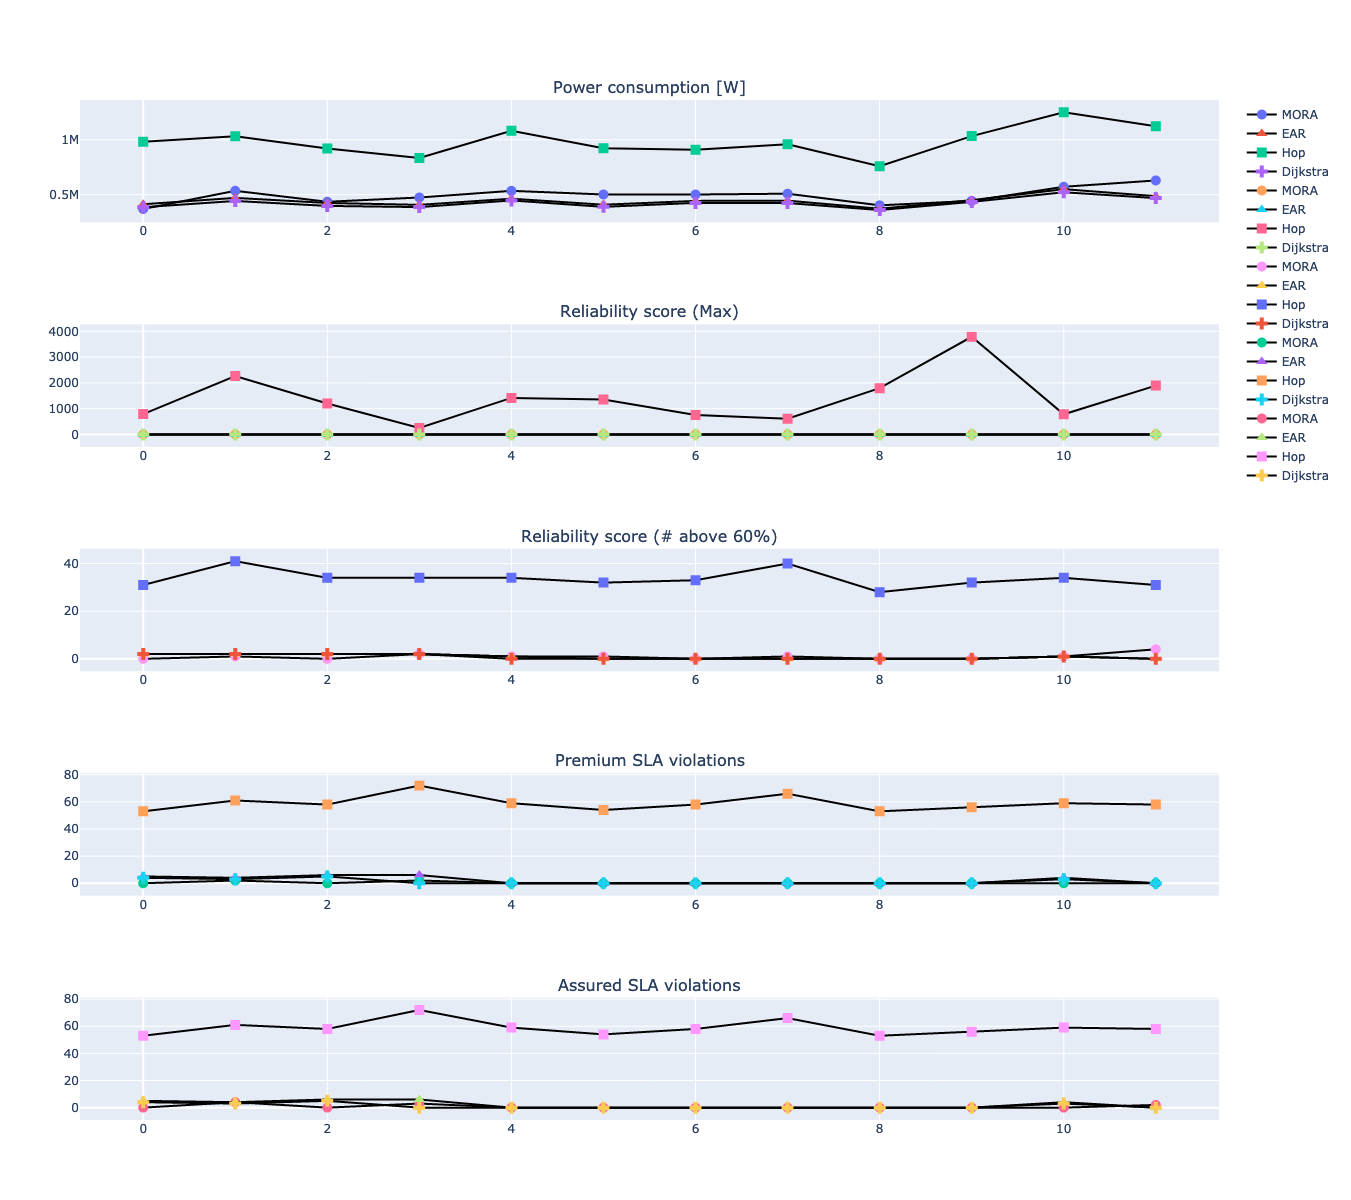

In [74]:
attributes = [df_MORA.columns[1], df_MORA.columns[2], df_MORA.columns[3], df_MORA.columns[6], df_MORA.columns[7]]
fig = make_subplots(rows=len(attributes), cols=1, subplot_titles=(df_MORA.columns[1], df_MORA.columns[2], df_MORA.columns[3], df_MORA.columns[6], df_MORA.columns[7]))
for idx, att in enumerate(attributes):
    
    pw_MORA = df_MORA[att]
    pw_EAR = df_EAR[att]
    pw_Hop = df_hop[att]
    pw_D = df_D[att]

    fig.add_trace(go.Scatter(x=x_axis, y=pw_MORA,
                        mode='lines+markers',
                        name='MORA', marker_symbol='circle', marker=dict(
                                color='rgba(3, 252, 32)',
                                size=10,)), row = idx+1, col=1)

    fig.add_trace(go.Scatter(x=x_axis, y=pw_EAR,
                        mode='lines+markers',
                        name='EAR', marker_symbol='triangle-up', marker=dict(
                                color='rgba(252, 3, 3)',
                                size=10,)), row = idx+1, col=1)
    
    fig.add_trace(go.Scatter(x=x_axis, y=pw_Hop,
                        mode='lines+markers',
                        name='Hop', marker_symbol='square', marker=dict(
                                color='rgba(3, 20, 252)',
                                size=10,)), row = idx+1, col=1)
    
    
    fig.add_trace(go.Scatter(x=x_axis, y=pw_D,
                        mode='lines+markers',
                        name='Dijkstra', marker_symbol='cross', marker=dict(
                                color='rgba(252, 132, 3)',
                                size=10,)), row = idx+1, col=1)
    
fig.update_layout(
autosize=False,
width=1300,
height=1200,)


fig.show()

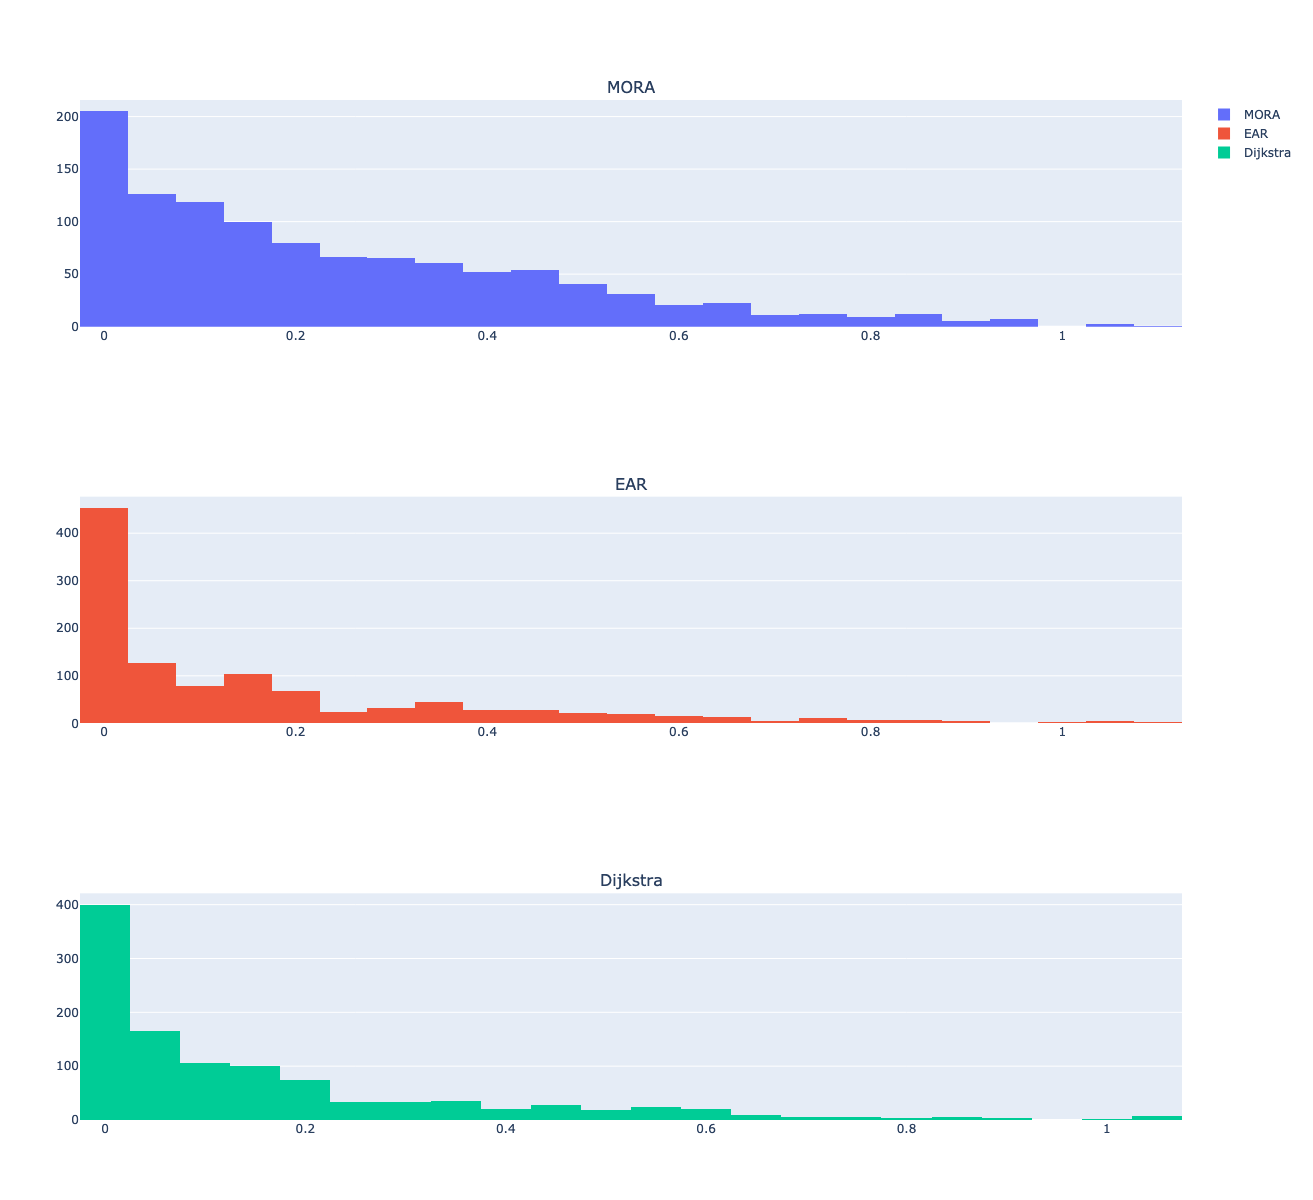

In [73]:
cat = []
for idx, df in enumerate([df_MORA['Link usage'], df_EAR['Link usage'], df_D['Link usage']]):
    cat.append([])
    for row in df:
        l = json.loads(row)
        cat[idx] = cat[idx] +l

names = ['MORA', 'EAR', 'Dijkstra']
fig = make_subplots(rows=len(cat), cols=1, subplot_titles=('MORA', 'EAR', 'Dijkstra'))

for alg in range(len(cat)):
    fig.add_trace(go.Histogram(x=cat[alg], name=names[alg]), row = alg+1, col=1)
    
fig.update_layout(
autosize=False,
width=1300,
height=1200,)

fig.show()